In [1]:
import numpy as np
import os
import PIL
import PIL.Image
import tensorflow as tf
import tensorflow_datasets as tfds
import matplotlib.pyplot as plt
from PIL import Image
from shutil import copyfile
from numpy.random import default_rng

print(tf.__version__)

2.4.0


In [2]:
rng = default_rng()

In [3]:
import pathlib
dataset_url = "http://peipa.essex.ac.uk/pix/mias/all-mias.tar.gz"
data_dir = tf.keras.utils.get_file(origin=dataset_url, 
                                   fname='mias',
                                   extract=True)


In [4]:
path = "/tmp/images/mias"

try:
    os.makedirs(path)
except Exception as e:
    print(e)

data_dir = pathlib.Path(os.path.dirname(data_dir))

#save images in png
for file in data_dir.glob('*.pgm'):
    file_name = file.name
    new_name = path + '/' + file.stem + ".png"
    Image.open(file).save(new_name)

data_dir = pathlib.Path(os.path.dirname(path))
print(data_dir)

[Errno 17] File exists: '/tmp/images/mias'
/tmp/images


In [5]:
img_height = 512
img_width = 512

batch_size = 1

In [6]:
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  directory= data_dir,
  validation_split=0.2,
  subset="training",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size,
  color_mode = "grayscale",
  label_mode=None)


Found 322 files belonging to 1 classes.
Using 258 files for training.


In [7]:
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="validation",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size,
  color_mode = "grayscale",
  label_mode=None)


Found 322 files belonging to 1 classes.
Using 64 files for validation.


In [8]:
print(val_ds.cardinality().numpy())
print(train_ds.cardinality().numpy())

64
258


In [9]:
from tensorflow.keras import layers

normalization_layer = tf.keras.layers.experimental.preprocessing.Rescaling(1./255)


In [10]:
normalized_train_ds = train_ds.map(lambda x: normalization_layer(x))
del train_ds

In [11]:
normalized_val_ds = val_ds.map(lambda x: normalization_layer(x))
del val_ds

In [12]:
saved_ds = list(tfds.as_numpy(normalized_train_ds))
np.save("/home/notchla/Documents/mias_y_gaussian0_2_train", np.squeeze(saved_ds, axis=1))
saved_ds = list(tfds.as_numpy(normalized_val_ds))
np.save("/home/notchla/Documents/mias_y_gaussian0_2_val", np.squeeze(saved_ds, axis=1))
del saved_ds


In [13]:
y_train = np.load("/home/notchla/Documents/mias_y_gaussian0_2_train.npy", allow_pickle=True)
print(y_train.shape)
y_val = np.load("/home/notchla/Documents/mias_y_gaussian0_2_val.npy", allow_pickle=True)
print(y_val.shape)

x_train = y_train + rng.normal(0, 0.2, y_train.shape)
print(x_train.shape)
x_val = y_val + rng.normal(0, 0.2, y_val.shape)
print(x_val.shape)

x_train = tf.clip_by_value(x_train, clip_value_min=0., clip_value_max=1.)
x_val = tf.clip_by_value(x_val, clip_value_min=0., clip_value_max=1.)

np.save("/home/notchla/Documents/mias_x_gaussian0_2_train", x_train)
np.save("/home/notchla/Documents/mias_x_gaussian0_2_val", x_val)


(258, 512, 512, 1)
(64, 512, 512, 1)
(258, 512, 512, 1)
(64, 512, 512, 1)


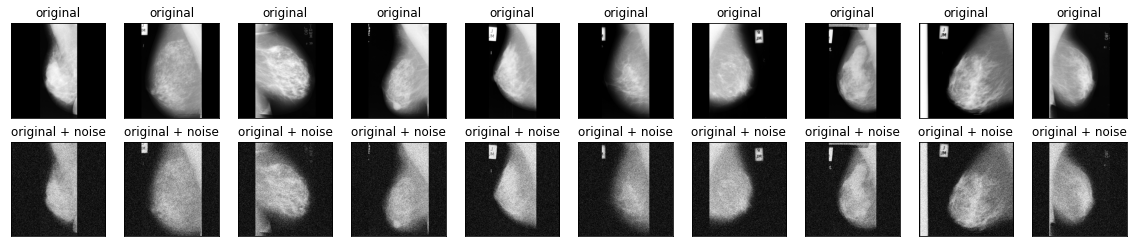

In [14]:
n = 10
plt.figure(figsize=(20, 4))
for i in range(n):
  # display original
  ax = plt.subplot(2, n, i + 1)
  plt.imshow(y_train[i])
  plt.title("original")
  plt.gray()
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)

  # display reconstruction
  ax = plt.subplot(2, n, i + 1 + n)
  plt.imshow(x_train[i])
  plt.title("original + noise")
  plt.gray()
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)
plt.show()


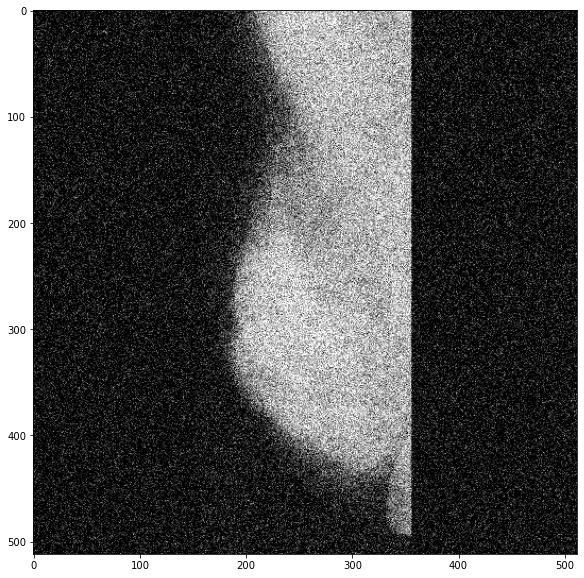

In [15]:
plt.figure(figsize=(10,10))
plt.imshow(x_train[0])
plt.gray()

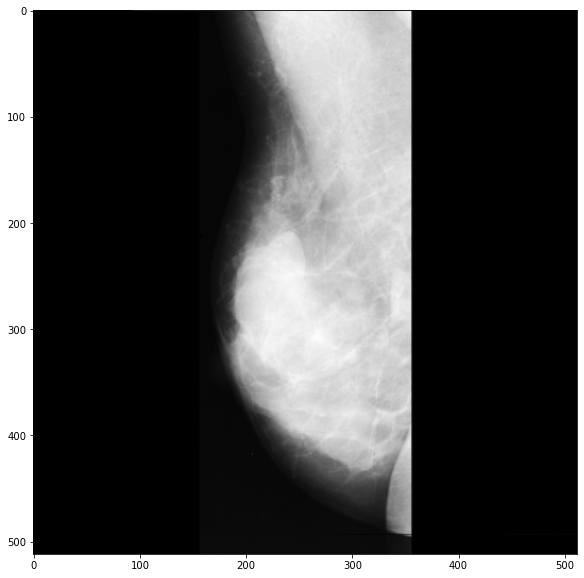

In [16]:
plt.figure(figsize=(10,10))
plt.imshow(y_train[0])
plt.gray()